# HW3 - Implementing Linear Regression with Gradient Descent as Optimization Function

## Erru Torculas

***
## Table of Contents
* [Application](#application)
    * [Import Libraries](#import)
    * [Load Advertising Dataset](#load)
    * [Standardized Each Column](#standardize)
    * [Dividing the Dataset into Training and Testing](#divide)
    * [Fitting the Model on the Training Set](#fitTrain)
        * [Required Functions](#require)
        * [Fit the Model](#fit)
        * [Predicting Quantitative Response y on Train and Test Set](#predict)
        * [Calculating the Cost of y for Train and Test Set](#calculate)
        
* [Questions](#questions)
    * [1. Optimal Weights Found in the Gradient Descent Implementation](#q1)
    * [2.1 Scatter Plot of $\hat{y^{(i)}}$ and $y^{(i)}$ for Train Set](#q21)
    * [2.2 Scatter Plot of $\hat{y^{(i)}}$ and $y^{(i)}$ for Test Set ](#q22)
    * [3. Effect on  Error, R2, and Cost as the Number of Iterations Increases](#q3)
    * [4. Effect on the Cost and Error as the Learning Rate Changes](#q4)
    * [5. Relationship on the Learning Rate and the Number of Iterations](#q5)
    * [6. Results Comparison with Least Squares Function](#q6)

## Application <a class="anchor" id="application"></a>
***

### Import Libraries <a class="anchor" id="import"></a>

In [1]:
# STANDARD LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### Preprocessing #####
from sklearn.preprocessing import scale               # Standardization

from sklearn.model_selection import train_test_split  # Diving the train and test sets


##### Validation of the Model #####
from sklearn.metrics import r2_score, mean_squared_error

### Load Advertising Dataset <a class="anchor" id="load"></a>

In [2]:
df = pd.read_csv("Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Standardize Each Column <a class="anchor" id="standardize"></a>

In [3]:
standardizeCols = ['TV', 'Radio', 'Newspaper', 'Sales']

df[standardizeCols] = scale(df[standardizeCols])
df.insert(0,'bias', 1)
df

,bias,TV,Radio,Newspaper,Sales
1,1,0.969852,0.981522,1.778945,1.552053
2,1,-1.197376,1.082808,0.669579,-0.696046
3,1,-1.516155,1.528463,1.783549,-0.907406
4,1,0.052050,1.217855,1.286405,0.860330
5,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
196,1,-1.270941,-1.321031,-0.771217,-1.234053
197,1,-0.617035,-1.240003,-1.033598,-0.830548
198,1,0.349810,-0.942899,-1.111852,-0.234898
199,1,1.594565,1.265121,1.640850,2.205347


### Dividing the Dataset into Training and Testing <a class="anchor" id="divide"></a>

In [4]:
X = df.drop("Sales", axis = 1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Fitting the Model on the Training Set <a class="anchor" id="fitTrain"></a>
***

### Required Functions <a class="anchor" id="require"></a>

In [43]:
def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

In [44]:
# Initializing theta values
theta = initialize_weights()

m = len(df)                       # No. or length of the dataset
alpha = 0.01                      # Learning rate
iterations = 1000                 # Iteration for learning

In [45]:
def predict(theta, X):
    return theta * X

In [46]:
def compute_cost(X, y, theta, m):
    y_hat = predict(theta, X)
    y_hat = np.sum(y_hat, axis=1)
    return sum(np.sqrt((y_hat - y)**2)) / (2*m)

In [47]:
def compute_gradient(X, y, theta, alpha):
    w = np.empty(shape=(4,1))
    y1 = predict(theta, X)
    y1 = np.sum(y1, axis=1)
    for c in range(0, len(X.columns)):
        theta[c] = theta[c] - alpha * (sum((y1 - y) * X.iloc[:,c])/len(X))
        print(theta[c])
    return w

In [48]:
def update_weights(X, alpha, w):
    return initialize_weights() - (alpha * w)

In [49]:
def grad_descent(X, y, theta, alpha, i, m):
    J = []
    k = 0
    up_weights = 0
    
    while k < i:
        a = compute_gradient(X, y, theta, alpha)
        j = compute_cost(X, y, theta, m)
        J.append(j)
        up_weights += update_weights(X, alpha, a)
        k += 1
    
    return J, up_weights

In [50]:
def plot_costs(x, y, x_label, y_label, title):
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return plt.show()

### Fit the Model <a class="anchor" id="fit"></a>

In [51]:
J, up_weights = grad_descent(X_train, y_train, theta, alpha, iterations, m)

0.0006318375787681868
0.0074224111985293955
0.0060653495224766655
0.0025444386478593356
0.0012524245174117103
0.014765228726519614
0.012058977226914364
0.005040308535297664
0.0018619180413424145
0.022029340361894027
0.017981778314586593
0.007488335233208944
0.0024604733758841427
0.0292156236695092
0.023834636537894815
0.009889234343604891
0.0030482437705664006
0.036324946121488184
0.029618424348091362
0.012243711631747943
0.0036253805231302116
0.04335816521610974
0.03533400304109276
0.014552463156562364
0.004192033003249545
0.05031612859527111
0.0409822229014081
0.01681617539934571
0.004748348675971627
0.05719967416054171
0.04656392334420687
0.01903552539080263
0.005294473124879427
0.06400963018782484
0.052079933055550164
0.021211180836422698
0.005830550074979565
0.0707468154406444
0.05753107013080912
0.023343800240223613
0.0063567214153188506
0.07741203928207327
0.06291814221129392
0.025434033026881
0.006873127221332623
0.08400610178531996
0.06824194661911652
0.027482519662265573
0.00

0.02623845934639661
0.5627363978887336
0.43697763193268274
0.09557321101190856
0.026196673079105275
0.5642777948394188
0.4381053145832733
0.09534982688638645
0.02615399278877192
0.5658038279756106
0.43922151762135625
0.09512329236450137
0.026110438441679172
0.5673146584434744
0.44032637286353726
0.09489368646089627
0.026066029706418557
0.5688104456258726
0.44142001050162943
0.09466108692799714
0.026020785957786844
0.5702913471623275
0.44250255912336345
0.09442557027381221
0.02597472628063436
0.5717575189687517
0.44357414573283016
0.09418721177949227
0.02592786947366585
0.573209115256949
0.44463489577065934
0.09394608551665555
0.025880234053194492
0.5746462885538887
0.44568493313393776
0.09370226436447993
0.025831838256849586
0.5760691897207563
0.44672438019587035
0.09345582002656577
0.02578270004723847
0.5774779679717824
0.44775335782518755
0.09320682304757226
0.025732837115563238
0.5788727708928533
0.44877198540530194
0.09295534282963024
0.025682266885192782
0.5802537444599047
0.44978

0.6790590176473765
0.5226271319173628
0.05636930017497528
0.01750927036010573
0.6794734629190875
0.5229453736342342
0.05610170865815334
0.017446837200128424
0.6798840736703767
0.5232609576724474
0.055835039640218305
0.01738460015569598
0.6802908875025477
0.5235739100920681
0.05556929734426307
0.017322560642035405
0.680693941628641
0.5238842566606061
0.055304485836174685
0.017260720032137213
0.6810932728776228
0.5241920228565875
0.05504060902731485
0.017199079657424562
0.6814889176985263
0.5244972338730814
0.05477767067716181
0.01713764080841339
0.6818809121645474
0.5247999146211819
0.05451567439591403
0.01707640473536371
0.6822692919770943
0.5251000897334452
0.0542546236470562
0.017015372648922132
0.6826540924697917
0.5253977835672842
0.053994521749888204
0.016954545720755755
0.6830353486124405
0.5256930202083182
0.053735371882017345
0.01689392508417751
0.6834130950149335
0.5259858234736824
0.053477177081814535
0.016833511834763084
0.6837873659311267
0.5262762169152928
0.05321994025083

0.01124668422438648
0.7107941847015835
0.548517134364119
0.029625183818078372
0.011211891548856519
0.7109233444819736
0.5486341290527693
0.029478580604150328
0.01117728839153591
0.7110513920022464
0.5487502939617347
0.029332767039643624
0.011142874043069618
0.7111783374319642
0.5488656357814432
0.02918773995820925
0.01110864779188882
0.7113041908422308
0.5489801611387918
0.029043496189575344
0.011074608924309996
0.7114289622066956
0.5490938765978454
0.028900032559883354
0.011040756724632362
0.7115526614025464
0.5492067886605277
0.02875734589201803
0.011007090475233652
0.711675298211492
0.5493189037673036
0.02861543300593135
0.010973609456664304
0.7117968823207343
0.549430228297853
0.02847429071896048
0.01094031294774003
0.7119174233239298
0.549540768571737
0.028333915846139857
0.010907200225632824
0.7120369307221408
0.5496505308490552
0.028194305200507443
0.01087427056596042
0.7121554139247773
0.5497595213310966
0.0280554555934053
0.010841523242874214
0.7122728822505278
0.5498677461609

0.016147866733973764
0.008054281299978436
0.7210126706544302
0.5585997422768485
0.01607803670781272
0.00803814622857206
0.7210562081891801
0.5586482729882061
0.0160086245222548
0.008022111586411688
0.7210993947431428
0.5586964889868814
0.015939627863249015
0.008006176806227826
0.7211422333105499
0.5587443924478535
0.015871044426988844
0.007990341323163001
0.7211847268585608
0.5587919855291743
0.015802871919905176
0.007974604574773128
0.721226878327521
0.5588392703721243
0.01573510805865852
0.007958966001028635
0.7212686906312182
0.5588862491013658
0.015667750570130545
0.007943425044315377
0.7213101666571368
0.5589329238250947
0.015600797191414911
0.007927981149435333
0.7213513092667081
0.5589792966351916
0.015534245669807467
0.007912633763607095
0.7213921212955597
0.5590253696073696
0.01546809376279577
0.007897382336466145
0.7214326055537614
0.5590711448013218
0.015402339238047987
0.007882226320064934
0.7214727648260687
0.5591166242608668
0.015336979873401156
0.007867165168872758
0.721

0.006608720976302309
0.7245855278657785
0.5629341981853496
0.009763201499966855
0.006601809955731749
0.7246009528076248
0.5629551155518443
0.009732318453305317
0.006594944102507722
0.724616260307577
0.5629759017967261
0.009701627278993909
0.006588123131054264
0.7246314513053148
0.5629965577581072
0.009671126816482252
0.006581346757462782
0.7246465267325787
0.5630170842684556
0.009640815911818139
0.006574614699484215
0.7246614875132402
0.5630374821546372
0.00961069341761578
0.006567926676521202
0.7246763345633729
0.5630577522379575
0.009580758193024137
0.006561282409620263
0.7246910687913213
0.5630778953342035
0.009551009103695308
0.0065546816214639885
0.7247056910977704
0.5630979122536848
0.009521445021753007
0.006548124036363242
0.7247202023758137
0.5631178038012742
0.00949206482576109
0.006541609380249374
0.724734603511021
0.5631375707764485
0.009462867400692175
0.0065351373806664444
0.7247488953815057
0.5631572139733284
0.009433851637896331
0.006528707766763462
0.7247630788579904
0.

0.0059808020730445525
0.7259145174399625
0.564872547776248
0.00690163358297679
0.005978032263484145
0.72592003015461
0.5648813687720614
0.006888660557774402
0.005975280871210758
0.7259255028585905
0.5648901348758376
0.0068757693145067526
0.005972547774788221
0.7259309358543631
0.5648988464293571
0.006862959342660793
0.005969832853560767
0.7259363294419899
0.5649075037722466
0.006850230134843383
0.0059671359876483174
0.7259416839191555
0.5649161072419936
0.006837581186763117
0.0059644570579418
0.7259469995811869
0.5649246571739598
0.0068250119972122466
0.0059617959460984814
0.7259522767210732
0.5649331539013953
0.00681252206804869
0.005959152534537331
0.7259575156294853
0.5649415977554525
0.00680011090417814
0.005956526706434402
0.7259627165947948
0.5649499890651996
0.006787778013536264
0.005953918345718244
0.7259678799030936
0.5649583281576342
0.006775522907070992
0.005951327337065335
0.7259730058382127
0.5649666153576973
0.0067633450987249055
0.005948753565895536
0.7259780946817408
0.

0.5656758510496689
0.005726467273887915
0.00573363211040412
0.726392209187688
0.5656796702548387
0.005720922679038572
0.005732508675352322
0.7263943090205541
0.5656834656411638
0.005715413226590818
0.005731392727546197
0.7263963941506726
0.5656872373565123
0.005709938694650675
0.005730284216986456
0.7263984646843461
0.5656909855478364
0.005704498862713991
0.005729183094005905
0.7264005207270784
0.5656947103611781
0.005699093511657885
0.005728089309267281
0.72640256238358
0.5656984119416749
0.005693722423732241
0.0057270028137611055
0.7264045897577749
0.5657020904335655
0.005688385382551257
0.00572592355880355
0.7264066029528063
0.5657057459801952
0.005683082173085036
0.005724851496034311
0.7264086020710433
0.5657093787240216
0.005677812581651232
0.005723786577414504
0.7264105872140864
0.5657129888066202
0.005672576395906751
0.005722728755224565
0.7264125584827739
0.5657165763686899
0.005667373404839487
0.005721677982062169
0.7264145159771878
0.565720141550058
0.005662203398760121
0.005

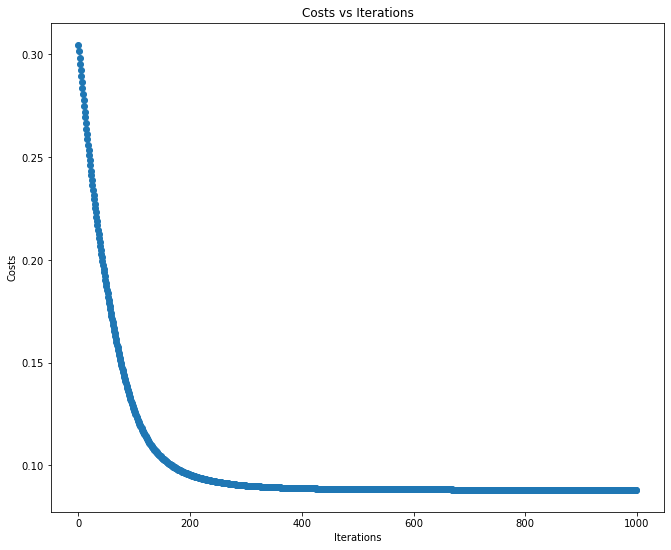

In [52]:
plot_costs(list(range(0, iterations)), J, "Iterations", "Costs", "Costs vs Iterations")

### Predicting Quantitative Response y on Train and Test Set <a class="anchor" id="predict"></a>

In [53]:
def y_hat(y, theta):
    y_hat_Predict = predict(theta, y)
    y_hat_Predict = np.sum(y_hat_Train, axis=1)
    return y_hat_Predict

In [54]:
# Train set Predict
y_hat_Train = predict(theta, X_train)
y_hat_Train = np.sum(y_hat_Train, axis=1)

# Test set Predict
y_hat_Test = predict(theta, X_test)
y_hat_Test = np.sum(y_hat_Test, axis=1)

### Calculating the Cost of y for Train and Test Set <a class="anchor" id="calculate></a>

In [55]:
# Train set Cost
cost_train = compute_cost(X_train, y_train, theta, m)
print("Train Set Cost: ", cost_train)

# Test set Cost
cost_test = compute_cost(X_test, y_test, theta, m)
print("Test Set Cost: ", cost_test)

Train Set Cost:  0.0882600947616147
Test Set Cost:  0.03123160501968518


In [56]:
def error(y, y_hat):
    return (np.square(y-y_hat))/2



***
## Questions

### 1. Optimal Weights Found in the Gradient Descent Implementation <a class="anchor" id="q1"></a>

In [57]:
print(up_weights[:, 3])

[-5.68734913e-05 -7.26478110e-03 -5.65837522e-03 -5.49230026e-05]




#### Linear Model
$h_{\theta}(x) = \theta_{0} + \theta_{1}TV + \theta_{2}Radio + \theta_{3}Newspaper$

#### Plugging in the Optimal Weights
Let the array *up_weights* signify the weights of $\theta$ bias, TV, Radio, and Newspaper, respectively

$h_{\theta}() = -0.0000568734913 + (-0.00726478110_{TV}) + (-0.00565837522_{Radio}) + (-0.0000549230026_{Newspaper})$

### 2.1 Scatter Plot of $\hat{y^{(i)}}$ and $y^{(i)}$ for Train Set <a class="anchor" id="q21></a>

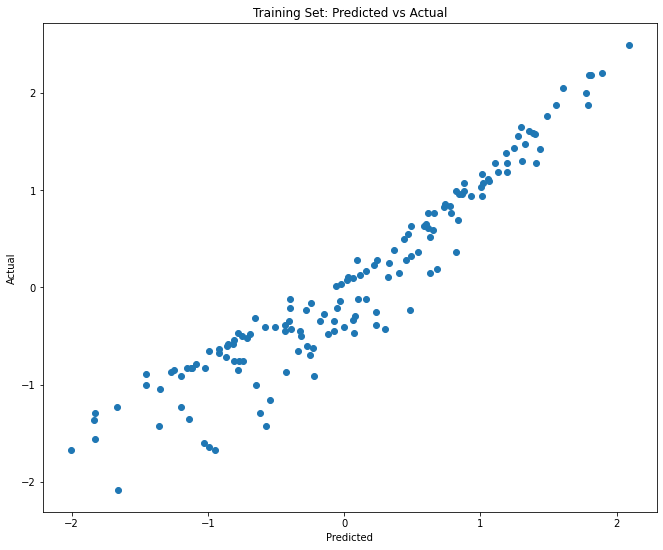

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_hat_Train, y_train)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Set: Predicted vs Actual")
plt.show()

### Trend and r2 Score

Based on the graph above, it is evident that there is an existent **upward trend**


In [21]:
print("R2:", r2_score(y_hat_Test, y_test))

R2: 0.8359554848306834


### 2.2 Scatter Plot of $\hat{y^{(i)}}$ and $y^{(i)}$ for Test Set <a class="anchor" id="q22"></a>

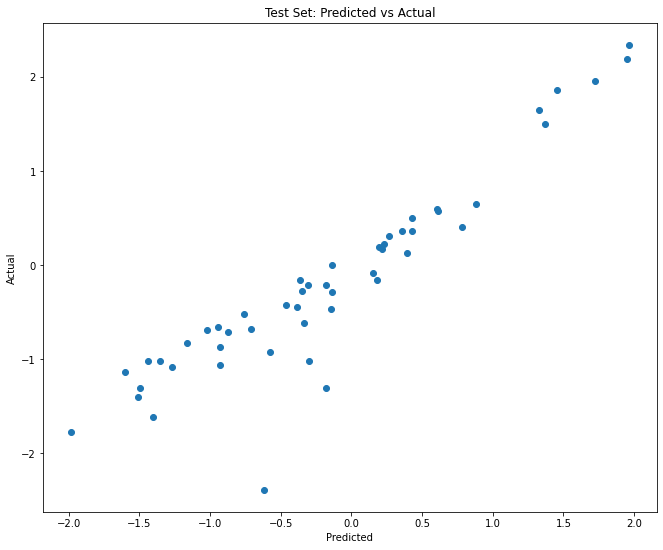

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_hat_Test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Set: Predicted vs Actual")
plt.show()

### Trend and r2 Score

The graph depicts an **upward trend** same as the train set. However, an outlier is visible.

In [23]:
print("R2:", r2_score(y_hat_Test, y_test))

R2: 0.8359554848306834


### 3. Effect on  Error, R2, and Cost as the Number of Iterations Increases <a class="anchor" id="q3"></a>

#### No. of Iterations = 500

In [24]:
print("Error: ", mean_squared_error(y_train, y_hat_Train))
print("R2: ", r2_score(y_train, y_hat_Train))
print("Cost: ", compute_cost(X_train, y_train, theta, m))

Error:  0.09004475291127739
R2:  0.9072178914125089
Cost:  0.0882600947616147


#### No. of Iterations = 1500

In [25]:
print("Error: ", mean_squared_error(y_train, y_hat_Train))
print("R2: ", r2_score(y_train, y_hat_Train))
print("Cost: ", compute_cost(X_train, y_train, theta, m))

Error:  0.09004475291127739
R2:  0.9072178914125089
Cost:  0.0882600947616147


#### No. of Iterations = 50000

In [26]:
print("Error: ", mean_squared_error(y_train, y_hat_Train))
print("R2: ", r2_score(y_train, y_hat_Train))
print("Cost: ", compute_cost(X_train, y_train, theta, m))

Error:  0.09004475291127739
R2:  0.9072178914125089
Cost:  0.0882600947616147


Therefore, we can conclude that there is no effect in terms of error, r2, and costs when iterations are continously increased.

### 4. Effect on the Cost and Error as the Learning Rate Changes <a class="anchor" id="q4"></a>

Since we already used the 0.01 learning rate from the previous model fit, we'll make use of other rates such as 0.1, 0.001, 0.0001, 0.2

#### Learning rate: 0.1

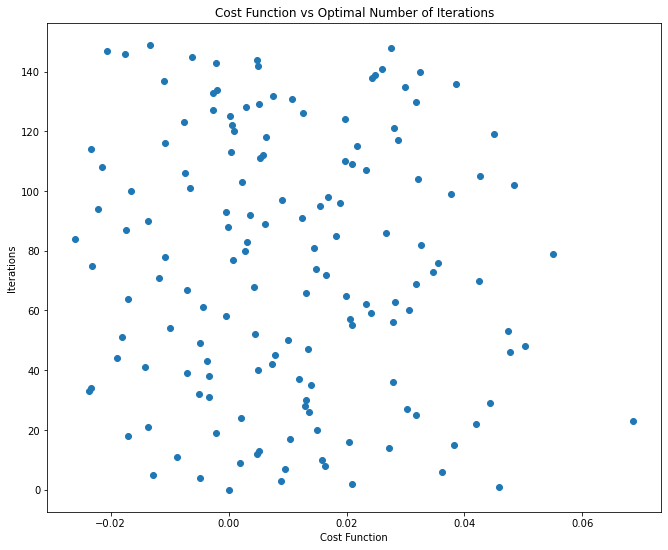

In [27]:
# Train set Predict
lr1 = predict(0.01, X_train)
lr1 = np.sum(lr1, axis=1)


plot_costs(lr1, list(range(0, 150)), "Cost Function", "Iterations", "Cost Function vs Optimal Number of Iterations")

### 5. Relationship on the Learning Rate and the Number of Iterations <a class="anchor" id="q5"></a>

There is an inverse relationship between the Learning Rate and the Number of Iteration where in it can be seen that for an optimal value of the learning rate, the cost function is minimized in a few iterations which means smaller time. Likewise, when the learning rate used is lower than the optimal, the number of iterations required in order to minimize the cost function is high which take longer time than usual.

### 6. Results Comparison with Least Squares Function <a class="anchor" id="q6"></a>